In [1]:
from IPython.display import display
import os
import sys

import maspy.reader
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

sys.path.append("..")
from python_scripts import ticplot

In [2]:
plt.rcParams["pdf.fonttype"] = 42
plt.rcParams["font.family"] = "Arial"

## Define parameters, load mzml files

In [3]:
# Define parameters
filedirs = {
    "untreated": "../ms_data/GFP-Atg8_untreated",
    "acetylated": "../ms_data/GFP-Atg8_acetylated",
}
filenames = {
    "untreated": [
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S1_untagged_8per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S2_untagged_8per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S3_untagged_8per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S4_Atg8GFP_8per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S5_Atg8GFP_8per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S6_Atg8GFP_8per",
    ],
    "acetylated": [
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S7_untagged_65per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S8_untagged_65per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S9_untagged_65per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S10_Atg8GFP_65per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S11_Atg8GFP_65per",
        "20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S12_Atg8GFP_65per",    
    ]
}
filepaths = []
for treatment, filedir in filedirs.items():
    for filename in filenames[treatment]:
        filepaths.append(os.path.join(filedir, filename + ".mzML"))

output_dir = "../plots/figure_4"

In [4]:
# Read mzml files
msrun_container = maspy.core.MsrunContainer()
for filepath in filepaths:
    print(filepath)
    maspy.reader.importMzml(filepath, msrunContainer=msrun_container)

../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S1_untagged_8per.mzML
../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S2_untagged_8per.mzML
../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S3_untagged_8per.mzML
../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S4_Atg8GFP_8per.mzML
../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S5_Atg8GFP_8per.mzML
../ms_data/GFP-Atg8_untreated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_unmod_S6_Atg8GFP_8per.mzML
../ms_data/GFP-Atg8_acetylated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S7_untagged_65per.mzML
../ms_data/GFP-Atg8_acetylated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S8_untagged_65per.mzML
../ms_data/GFP-Atg8_acetylated\20171123_QexHF2_RSLC2_Hollenstein_Hartl_UW_MFPL_GFP_MA_ac_S9_untagged_

## Plot figures

In [5]:
fig_basename = "tic_plots_acetylated_vs_untreated"
labels = {
    "acetylated": "Sulfo-NHS-Ac treated\n65% of sample injected",
    "untreated": "Mock treated\n8% of sample injected",
}
colors = {
    "acetylated": "#E73C40",  # "#FD4C54",
    "untreated": "#808080",  # "#00CAC0",
}
light_colors = {
    "acetylated": "#f18a8c", # "#fe9498",
    "untreated": "#B0B0B0",  # "#83e3da",
}

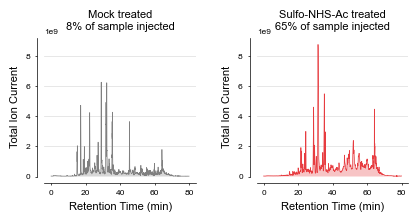

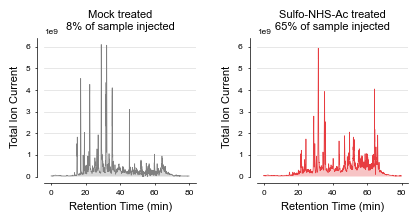

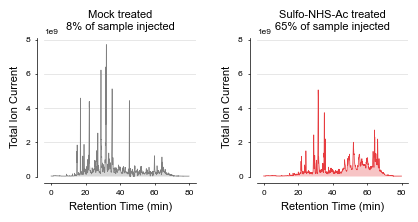

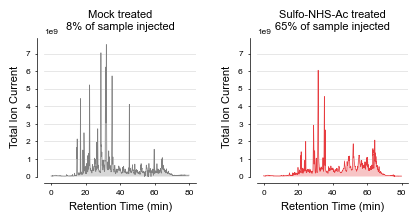

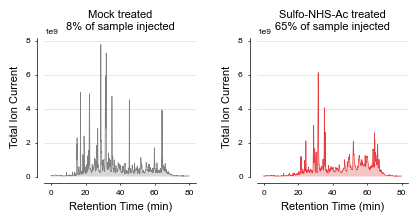

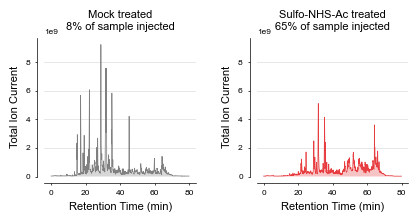

In [6]:
for filename_counter in range(6):
    fig, axes = plt.subplots(1, 2, figsize=(4.7, 1.8))
    for ax, condition in zip(axes, ["untreated", "acetylated"]):
        filename = filenames[condition][filename_counter]
        arrays = msrun_container.getArrays(
            ["tic", "basepeakI", "rt"],
            sort="rt",
            specfiles=filename,
            selector=lambda si: si.msLevel == 1,
        )
        arrays["rt"] = arrays["rt"] / 60
        style = {"color": colors[condition], "lw": 0.5, "label": labels[condition]}
        
        ticplot(arrays["rt"], arrays["tic"], plotkwargs=style, ax=ax)
        ax.fill_between(
            x=arrays["rt"],
            y1=arrays["tic"],
            y2=[0] * len(arrays["tic"]),
            color=light_colors[condition],
            alpha=0.5,
            edgecolor="None",
        )

        ax.set_title(labels[condition], fontsize=8)

    max_ylim = [0, max([ax.get_ylim()[1] for ax in axes])]
    for ax in axes:
        ax.set_ylim(max_ylim)
    fig.subplots_adjust(wspace=0.4)

    fig_name_extenstion = "GFP-Atg8" if "Atg8" in filename else "Untagged"
    replicate = f"R{filename_counter % 3 + 1}"
    fig_name = "_".join([fig_basename, fig_name_extenstion, replicate]) + ".pdf"
    figpath = os.path.join(output_dir, fig_name)
    fig.savefig(figpath, dpi=300)